# Aula 1 - Análise de Dados com Pandas

    Ensinar a carregar arquivos CSV no Google Colab, realizar leitura e visualização inicial de dados com Pandas. O aluno começará a manipular bases reais de dados com comandos simples de análise.

## Imports de bibliotecas

In [1]:
import pandas as pd

## Import de dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

df.head() # Por padrão mostra as 5 primeiras linhas da base de dados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Mostra as informações da base de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


### Mostra algumas estátisticas da base de dados

In [4]:
df.describe() # Para ver estatísticas descritivas de colunas numéricas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


### Verificar a dimensão da base de dados

In [5]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


### Mostrar as colunas do dataframe

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomear as colunas para portugues brasileiro

In [7]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'contrato_emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_do_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia_empregado',
    'remote_ratio': 'tipo_trabalho',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'nivel_experiencia', 'contrato_emprego', 'cargo', 'salario',
       'moeda_do_salario', 'salario_em_usd', 'residencia_empregado',
       'tipo_trabalho', 'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

### Renomear algumas categorias para melhor compreensão dos dados

In [8]:
renomear_nivel_experiencia = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["nivel_experiencia"] = df["nivel_experiencia"].replace(renomear_nivel_experiencia)

renomear_contrato_emprego = {
    'FT': 'Tempo Integral',
    'PT': 'Meio Período',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

df["contrato_emprego"] = df["contrato_emprego"].replace(renomear_contrato_emprego)

renomear_tipo_trabalho = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df["tipo_trabalho"] = df["tipo_trabalho"].replace(renomear_tipo_trabalho)

renomear_tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}
df["tamanho_empresa"] = df["tamanho_empresa"].replace(renomear_tamanho_empresa)


### Verificar a frequencia de cada categoria dentro da coluna nivel_experiencia

In [9]:
df["nivel_experiencia"].value_counts() 

# O método value_counts() do Pandas retorna a contagem de ocorrências de cada valor único em uma coluna de um DataFrame. Ou seja, ele mostra quantas vezes cada
# categoria aparece naquela coluna, ordenando do mais frequente para o menos frequente.

nivel_experiencia
Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

### Verificar a frequencia de cada categoria dentro da coluna contrato_emprego

In [10]:
df["contrato_emprego"].value_counts() 

contrato_emprego
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64

### Verificar a frequencia de cada categoria dentro da coluna tipo_trabalho

In [11]:
df["tipo_trabalho"].value_counts() 

tipo_trabalho
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

### Verificar a frequencia de cada categoria dentro da coluna tamanho_empresa

In [12]:
df["tamanho_empresa"].value_counts() 

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

### Verificar o dataframe após as alterações feitas

In [13]:
df.head()

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [14]:
df.describe(include='object') # Para ver estatísticas descritivas de colunas categóricas

,nivel_experiencia,contrato_emprego,cargo,moeda_do_salario,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [15]:
df.describe()

,ano,salario,salario_em_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


    Palavra chave da primeira aula é: Pandas    

# Aula 2 - Preparação e limpeza de dados

    Nesta aula, você vai aprender a tratar dados de forma mais estruturada, preparando a base para análises mais assertivas. O foco está em identificar e lidar com dados faltantes, organizar colunas, aplicar filtros e gerar estatísticas descritivas que ajudam a entender melhor os dados e extrair insights relevantes.

### Verificar se existem valores nulos na base de dados

In [16]:
df.isnull() # Retorna um DataFrame booleano indicando se cada valor é nulo (True) ou não (False).

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


### Verificar onde estão os dados nulos

In [17]:
df.isnull().sum() # Verificando valores nulos

ano                     10
nivel_experiencia        0
contrato_emprego         0
cargo                    0
salario                  0
moeda_do_salario         0
salario_em_usd           0
residencia_empregado     0
tipo_trabalho            0
localizacao_empresa      0
tamanho_empresa          0
dtype: int64

### Mostrar quais os valores únicos da coluna 'ano'

In [18]:
df['ano'].unique() # Verificando os anos únicos na coluna 'ano'

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

### Exibe as linhas onde os valores nulos são encontrados

In [19]:
df[df.isnull().any(axis=1)] # Exibindo linhas com valores nulos

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


## Criando um dataframe para exemplo

In [20]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['João', 'Maria', 'Pedro', 'Ana', 'Luíza'],
    'salario': [5000, np.nan, 7000, np.nan, 100000],
})

# Calculando a média dos salários e cria uma nova coluna
# substituindo os valores nulos pela média
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calculando a mediana dos salários e cria uma nova coluna
# substituindo os valores nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,João,5000.0,5000.00,5000.0
1,Maria,NaN,37333.33,7000.0
2,Pedro,7000.0,7000.00,7000.0
3,Ana,NaN,37333.33,7000.0
4,Luíza,100000.0,100000.00,100000.0


### Exemplo com temperaturas e Foward Fill

In [21]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27],
})

df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()

df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


### Exemplo com temperaturas e Back Fill

In [22]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27],
})

df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()

df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


### Exemplo de preenchimento com valor fixo

In [23]:
df_cidades = pd.DataFrame({
    "Nome": ["João", "Maria", "Pedro", "Ana", "Luíza"],
    "Cidade": ["São Paulo", np.nan, "Belo Horizonte", np.nan, "Curitiba"]
})

df_cidades["cidade_preenchida"] = df_cidades["Cidade"].fillna("Não Informada")

display(df_cidades)

,Nome,Cidade,cidade_preenchida
0,João,São Paulo,São Paulo
1,Maria,NaN,Não Informada
2,Pedro,Belo Horizonte,Belo Horizonte
3,Ana,NaN,Não Informada
4,Luíza,Curitiba,Curitiba


### Retomando ao dataframe original para remover as linhas em que o ano estava nulo

In [24]:
df_limpo = df.dropna() # O método dropna() do Pandas é usado para remover linhas ou colunas que contêm valores nulos (NaN) de um DataFrame. 
# Por padrão, ele remove todas as linhas que contêm pelo menos um valor nulo, mas você pode especificar parâmetros adicionais para personalizar o comportamento.

df_limpo.isnull().sum()  # Verificando se ainda há valores nulos após a remoção

ano                     0
nivel_experiencia       0
contrato_emprego        0
cargo                   0
salario                 0
moeda_do_salario        0
salario_em_usd          0
residencia_empregado    0
tipo_trabalho           0
localizacao_empresa     0
tamanho_empresa         0
dtype: int64

In [25]:
df_limpo.head()  # Exibindo as primeiras linhas do DataFrame limpo

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [26]:
df_limpo.info()  # Verificando as informações do DataFrame limpo

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ano                   133339 non-null  float64
 1   nivel_experiencia     133339 non-null  object 
 2   contrato_emprego      133339 non-null  object 
 3   cargo                 133339 non-null  object 
 4   salario               133339 non-null  int64  
 5   moeda_do_salario      133339 non-null  object 
 6   salario_em_usd        133339 non-null  int64  
 7   residencia_empregado  133339 non-null  object 
 8   tipo_trabalho         133339 non-null  object 
 9   localizacao_empresa   133339 non-null  object 
 10  tamanho_empresa       133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


###  Alterando o tipo de dado da coluna 'ano' para int64

In [27]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

df_limpo.head()

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [28]:
df_limpo.info()  # Verificando as informações do DataFrame limpo após a alteração do tipo de dado

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ano                   133339 non-null  int64 
 1   nivel_experiencia     133339 non-null  object
 2   contrato_emprego      133339 non-null  object
 3   cargo                 133339 non-null  object
 4   salario               133339 non-null  int64 
 5   moeda_do_salario      133339 non-null  object
 6   salario_em_usd        133339 non-null  int64 
 7   residencia_empregado  133339 non-null  object
 8   tipo_trabalho         133339 non-null  object
 9   localizacao_empresa   133339 non-null  object
 10  tamanho_empresa       133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


    Palavra chave da segunda aula: Print

# Aula 3 - Crie Gráficos e conte histórias com dados

    Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [29]:
df_limpo.head()

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


### Testando o uso de gráficos simples

<Axes: title={'center': 'Distribuição de Nível de Experiência'}, xlabel='nivel_experiencia'>

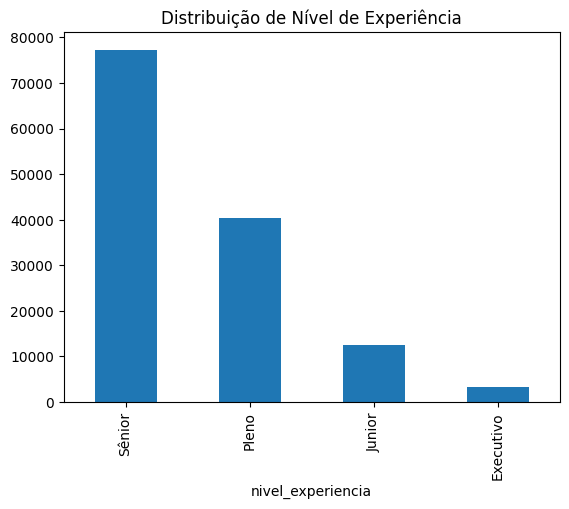

In [30]:
df_limpo["nivel_experiencia"].value_counts().plot(kind="bar", title="Distribuição de Nível de Experiência")

### Usando bibliotecas mais avançadas

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

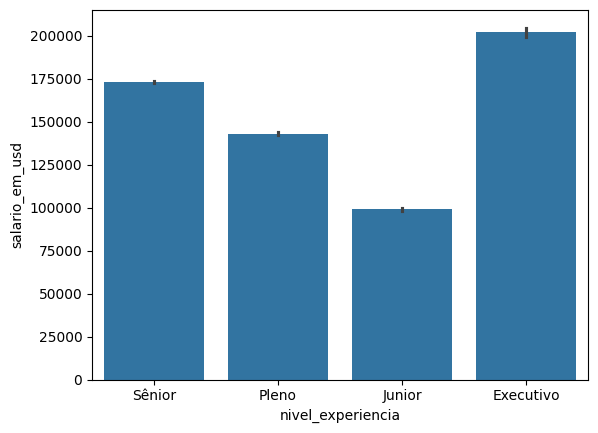

In [31]:
import seaborn as sns

sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')

### Melhorando a apresentação do gráfico

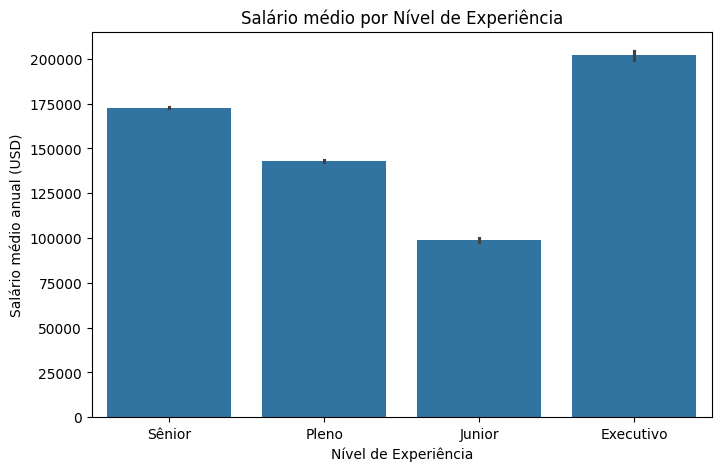

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd')
plt.title('Salário médio por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário médio anual (USD)')
plt.show()

### Ordenando os dados para ter uma melhor visualização

In [33]:
# Ordena de forma decrescente os niveis de experiência com base no salário médio
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False)

nivel_experiencia
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: salario_em_usd, dtype: float64

In [34]:
# Criando uma variável para armazenar o index em ordem decrescente dos níveis de experiência com base no salário médio
nivel_exp_ordenado = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).index
nivel_exp_ordenado

Index(['Executivo', 'Sênior', 'Pleno', 'Junior'], dtype='object', name='nivel_experiencia')

### Usando a váriavel com os index ordenados para melhorar a visualização do gráfico

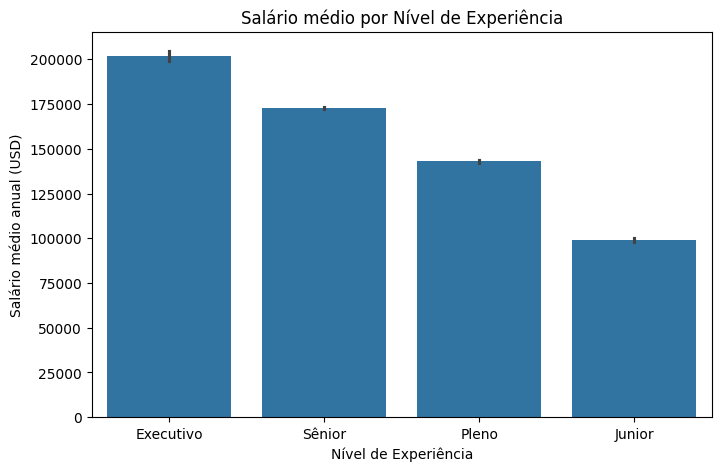

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='nivel_experiencia', y='salario_em_usd', order=nivel_exp_ordenado)
plt.title('Salário médio por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário médio anual (USD)')
plt.show()

### Usando um Histograma

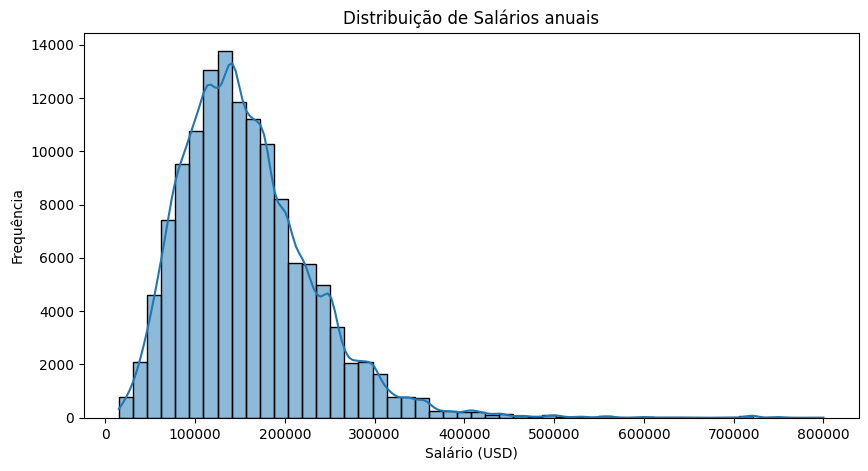

In [36]:
plt.figure(figsize=(10, 5)) # figsize=(largura, altura)
sns.histplot(df_limpo['salario_em_usd'], bins=50, kde=True)
plt.title('Distribuição de Salários anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

### Usando Boxplot

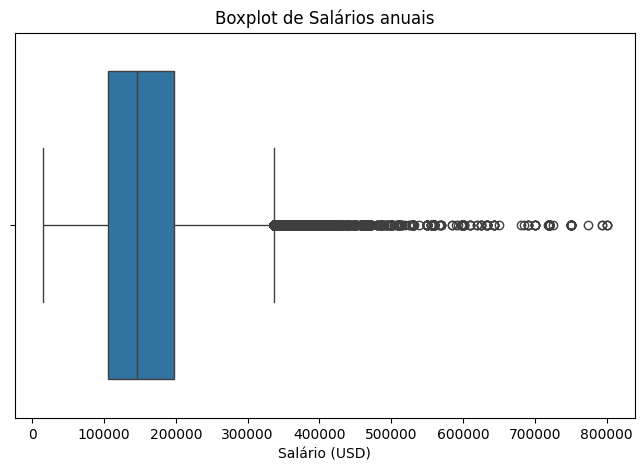

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['salario_em_usd'])
plt.title('Boxplot de Salários anuais')
plt.xlabel('Salário (USD)')
plt.show()

### Melhorando a visualização do boxplot para uma melhor compreensão

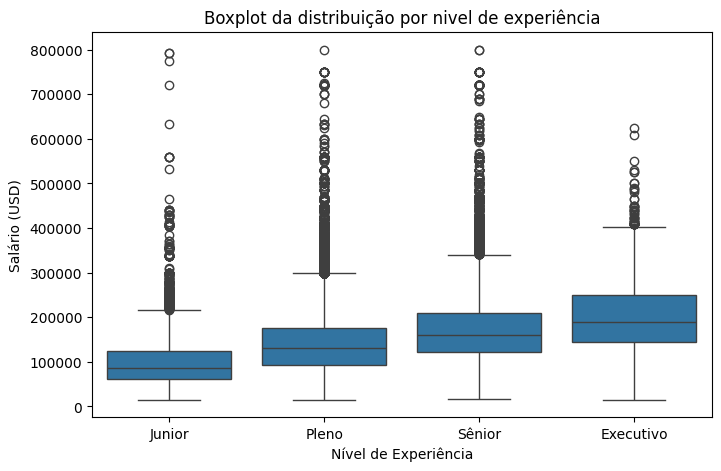

In [38]:
# Criando uma lista com a ordem dos níveis de experiência para o boxplot
# Poderia usar a variável nivel_exp_ordenado, porém precisaria inverter a ordem
ordem_nivel_exp = ['Junior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_exp)
plt.title('Boxplot da distribuição por nivel de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

Adicionando variações de cores

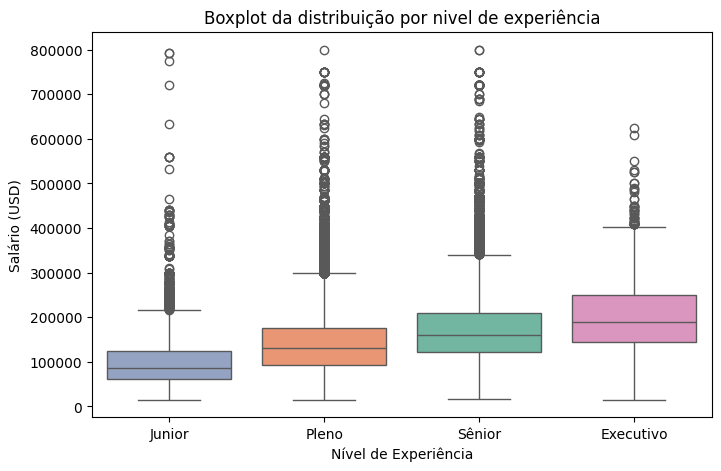

In [39]:
# Criando uma lista com a ordem dos níveis de experiência para o boxplot
# Poderia usar a variável nivel_exp_ordenado, porém precisaria inverter a ordem
ordem_nivel_exp = ['Junior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='nivel_experiencia', y='salario_em_usd', data=df_limpo, order=ordem_nivel_exp, palette='Set2', hue='nivel_experiencia')
plt.title('Boxplot da distribuição por nivel de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

### Trabalhando com gráficos interativos

In [40]:
# Biblioteca para gráficos interativos
import plotly.express as px

In [41]:
# Media salarial por nível de experiência
media_salario_nivel_exp = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(media_salario_nivel_exp,
             x='nivel_experiencia',
             y='salario_em_usd',
             title='Salário médio por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Experiência', 'salario_em_usd': 'Salário Médio (USD)'})
fig.show()

### Fazendo gráficos interativos de pizza e rosca

Gráfico de pizza

In [42]:
# Contagem de tipos de trabalho
contagem_remoto = df_limpo['tipo_trabalho'].value_counts().reset_index()
contagem_remoto.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(contagem_remoto,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção de Tipos de Trabalho')
fig.show()

Gráfico de rosca

In [43]:
# Contagem de tipos de trabalho
contagem_remoto = df_limpo['tipo_trabalho'].value_counts().reset_index()
contagem_remoto.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(contagem_remoto,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção de Tipos de Trabalho',
             hole=0.5)  # Adicionando um buraco para criar um gráfico de rosca
fig.show()

Melhorando o gráfico de rosca

In [44]:
# Contagem de tipos de trabalho
contagem_remoto = df_limpo['tipo_trabalho'].value_counts().reset_index()
contagem_remoto.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(contagem_remoto,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção de Tipos de Trabalho',
             hole=0.5)  # Adicionando um buraco para criar um gráfico de rosca
fig.update_traces(textinfo='percent+label')  # Exibindo porcentagens e rótulos
fig.show()

    Palavra chave da terceira aula: Matplotlib

# Desafio

    Fazer um gráfico interativo relacionando o salário com o país de residência, especificando o cargo de Data Scientist

### Filtrando apenas o cargo Data Scientist

In [45]:
data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']
data_scientist.head(5)

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa
6,2025,Sênior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Média
7,2025,Sênior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Média
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Média
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Média
65,2025,Sênior,Tempo Integral,Data Scientist,258000,USD,258000,US,Presencial,US,Média


### Primeira visualização do gráfico relacionando residência do empregado e salário

<Axes: xlabel='residencia_empregado', ylabel='salario_em_usd'>

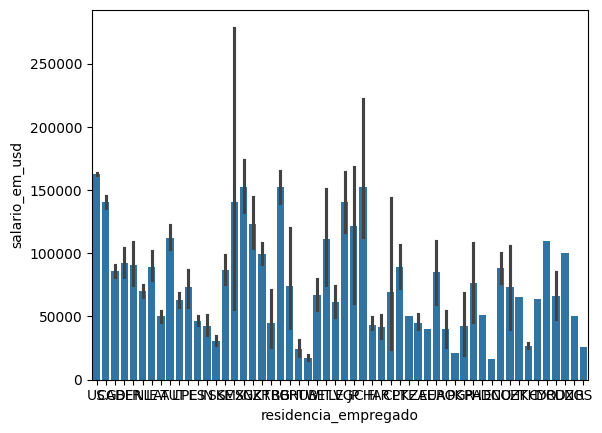

In [46]:
sns.barplot(data=data_scientist, x='residencia_empregado', y='salario_em_usd')

### Melhorando o gráfico

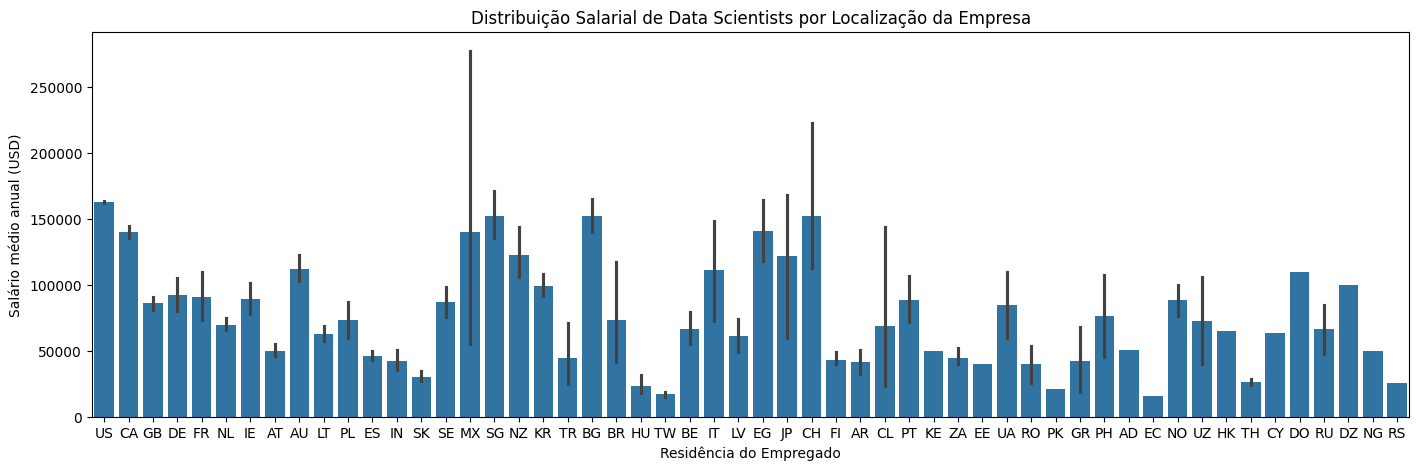

In [47]:
plt.figure(figsize=(17, 5))
sns.barplot(data=data_scientist, x='residencia_empregado', y='salario_em_usd')
plt.title('Distribuição Salarial de Data Scientists por Localização da Empresa')
plt.xlabel('Residência do Empregado')
plt.ylabel('Salário médio anual (USD)')
plt.show()

### Ordenando em formato decrescente a média salarial de acordo com o país de residência

In [48]:
salario_media_loc = data_scientist.groupby('residencia_empregado')['salario_em_usd'].mean().sort_values(ascending=False).index
salario_media_loc

Index(['US', 'SG', 'BG', 'CH', 'EG', 'CA', 'MX', 'NZ', 'JP', 'AU', 'IT', 'DO',
       'DZ', 'KR', 'DE', 'FR', 'IE', 'PT', 'NO', 'SE', 'GB', 'UA', 'PH', 'BR',
       'PL', 'UZ', 'NL', 'CL', 'BE', 'RU', 'HK', 'CY', 'LT', 'LV', 'AD', 'AT',
       'NG', 'KE', 'ES', 'TR', 'ZA', 'FI', 'IN', 'GR', 'AR', 'EE', 'RO', 'SK',
       'TH', 'RS', 'HU', 'PK', 'TW', 'EC'],
      dtype='object', name='residencia_empregado')

### Usando a váriavel com os index ordenados para melhorar a visualização do gráfico

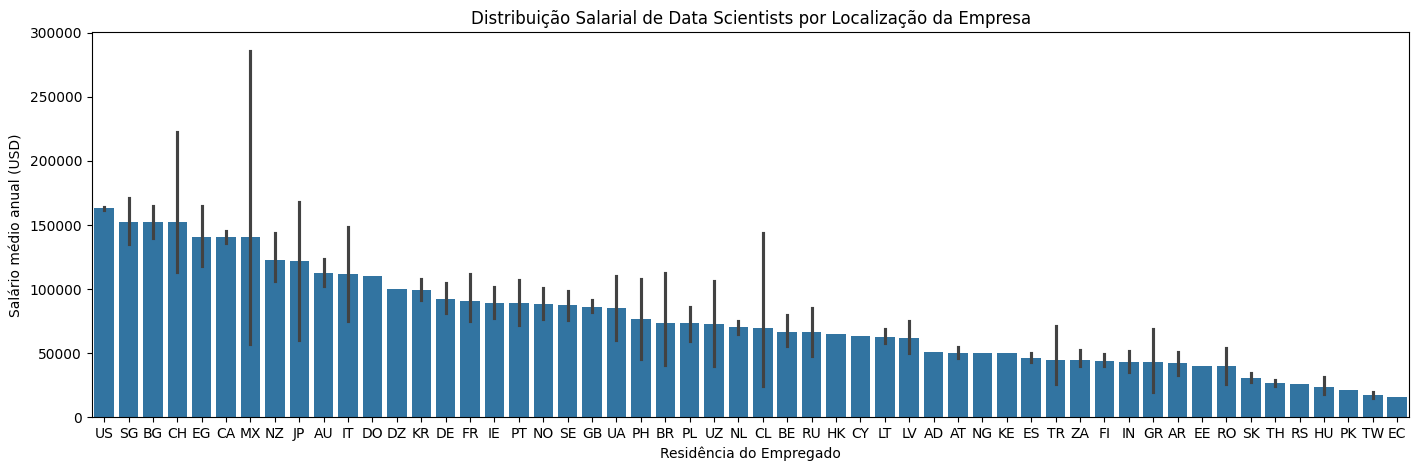

In [52]:
plt.figure(figsize=(17, 5))
sns.barplot(data=data_scientist, x='residencia_empregado', y='salario_em_usd', order=salario_media_loc)
plt.title('Distribuição Salarial de Data Scientists por Localização da Empresa')
plt.xlabel('Residência do Empregado')
plt.ylabel('Salário médio anual (USD)')
plt.show()

### Usando gráfico interativo

In [53]:
media_salario_loc = data_scientist.groupby('residencia_empregado')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(media_salario_loc,
             x='residencia_empregado',
             y='salario_em_usd',
             title='Distribuição Salarial de Data Scientists por Localização de Moradia',
             labels={'residencia_empregado': 'País de Residência do Empregado', 'salario_em_usd': 'Salário Médio (USD)'},
             width=1500,
             height=500,)

fig.show()

# Resposta do desafio

### Importando a biblioteca necessária

In [54]:
import pycountry

### Função para converter ISO-2 para ISO-3

In [55]:
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

### Criar nova coluna com código ISO-3

In [56]:
df_limpo['residencia_iso3'] = df_limpo['residencia_empregado'].apply(iso2_to_iso3)

Visualizando a base de dados modificada

In [62]:
df_limpo.head()

,ano,nivel_experiencia,contrato_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_empregado,tipo_trabalho,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


Salvar a base de dados

In [63]:
df_limpo.to_csv('Dados_finais-imersao_alura.csv', index='False')

### Calcular a média salarial por país (ISO-3)

In [57]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_em_usd'].mean().reset_index()

### Gerar mapa

In [61]:
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_em_usd',
                    color_continuous_scale='RdYlGn',
                    title="Salário médio de Cientista de Dados por País",
                    labels={'salario_em_usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

    Palavra chave da quarta aula: Alura